In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model's input requirements (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
from tensorflow.keras import layers, models

# Create a Sequential model
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units for the 10 classes
model.add(layers.Dense(10, activation='softmax'))


D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8482 - loss: 0.4697 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9822 - loss: 0.0586 - val_accuracy: 0.9832 - val_loss: 0.0539
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9872 - loss: 0.0388 - val_accuracy: 0.9890 - val_loss: 0.0370
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9905 - val_loss: 0.0351


In [4]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9889 - loss: 0.0338
Test accuracy: 0.9914000034332275


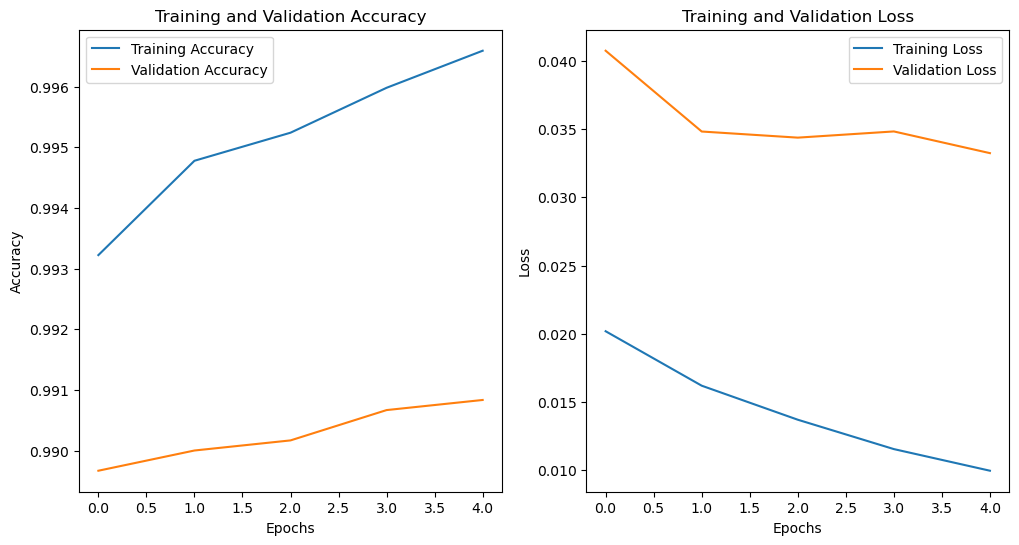

In [6]:
import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


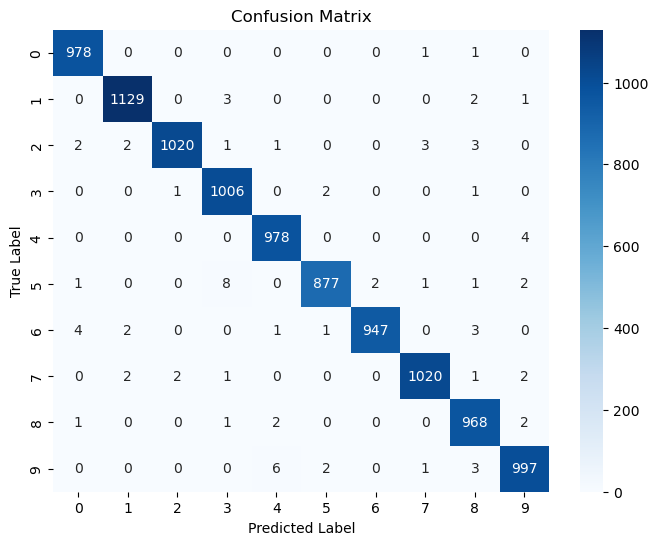

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0387
Test accuracy: 0.9919999837875366


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions on the test data
y_pred = model.predict(x_test)

# Convert predictions to class labels (the index of the max value in the probability array)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")
